# Importing Necessary Python Libraries

### Author -  Aishwarya

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
churn_df = pd.read_csv('churn_final.csv')
churn_df

,call_failure,complains,subs_len,charge_amount,seconds_of_use,freq_of_use,freq_of_sms,distinct_call_nums,tariff_plan,status,age,ageGroup,customer_value,FN,FP,Churn
0,8,0,38,0,4370,71.000000,5.000000,17.0,1,1,5,1,197.640,177.8760,69.7640,0
1,0,0,39,0,0,5.000000,7.000000,4.0,1,1,6,1,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60.000000,359.000000,24.0,1,1,2,1,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66.000000,1.000000,35.0,1,1,10,1,240.020,216.0180,74.0020,0
4,3,0,32,0,2393,58.000000,2.000000,33.0,1,1,9,1,145.805,131.2245,64.5805,0
5,11,0,38,1,3775,82.000000,32.000000,0.0,1,1,15,1,282.280,254.0520,78.2280,0
6,4,0,38,0,2360,39.000000,285.000000,18.0,1,1,1,1,1235.960,1112.3640,173.5960,0
7,13,0,37,2,9115,121.000000,144.000000,43.0,1,1,15,1,945.440,850.8960,144.5440,0
8,7,0,38,0,13773,169.000000,73.262238,44.0,1,1,15,1,557.680,501.9120,105.7680,0
9,7,0,38,1,4515,83.000000,2.000000,25.0,1,1,11,1,191.920,172.7280,69.1920,0


<b> *The given dataset has severe class imbalance* </b>

In [65]:
import matplotlib.pyplot as plt
def countplot(x,df):
    sns.set_style("dark")
    sns.set(rc={'figure.figsize':(8,8)})
    sns.countplot(x=x, data=df, palette=sns.color_palette("Paired", 7), saturation=10)
    plt.title('Count plot',fontsize = 20);
    plt.savefig('Countplot.png')
    plt.show()

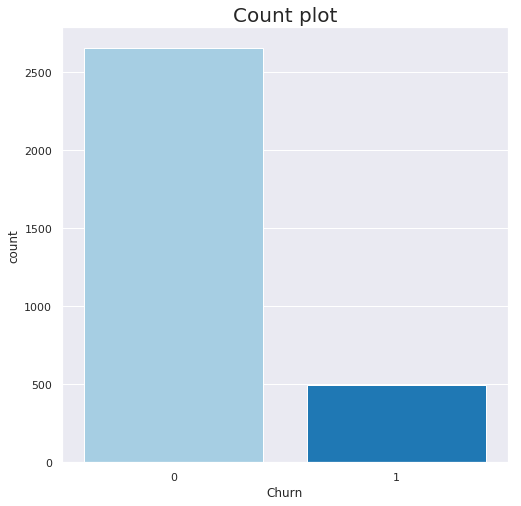

In [66]:
countplot('Churn',churn_df)

<b> *Challenge of working with imbalanced datasets:* </b>
<br>    Most machine learning techniques will ignore, and in turn have poor performance on, the minority class
<br> Biased predictions
<br> Misleading accuracy

<b> *Ways to addressing imbalanced datasets:* </b>
<br>    Oversample the minority class 

<b> Synthetic Minority Oversampling Technique </b>
<br>  It involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

<b> Balance the classes by increasing minority or decreasing majority </b>
<br> Random Under-sampling</br>
- Randomly remove majority class observations
- Helps balance the dataset
- Discarded observations could have important information
- May lead to bias
<br> Or undersampling majority dataset</br>
- Randomly add more minority observations by replication
- No information loss
- Prone to overfitting due to copying same information

In [67]:
X = churn_df.iloc[:,:15]
y = churn_df.iloc[:,15]

In [68]:
# Scaling data
scaler=StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [70]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 1872, 1: 333}

In [72]:
# Applying SMOTE technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [73]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 1872, 1: 1872}

Here, after applying SMOTE we treat the imbalanced data and we are able to get same number of values for both the categories i.e, churn and non-churn

### Resampling techniques

In [78]:
# class count
class_count_0, class_count_1 = churn_df['Churn'].value_counts()
# divie class
class_0 = churn_df[churn_df['Churn'] == 0]
class_1 = churn_df[churn_df['Churn'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (2655, 16)

class 1: (495, 16)


total class of 1 and 0:
 1    495
0    495
Name: Churn, dtype: int64


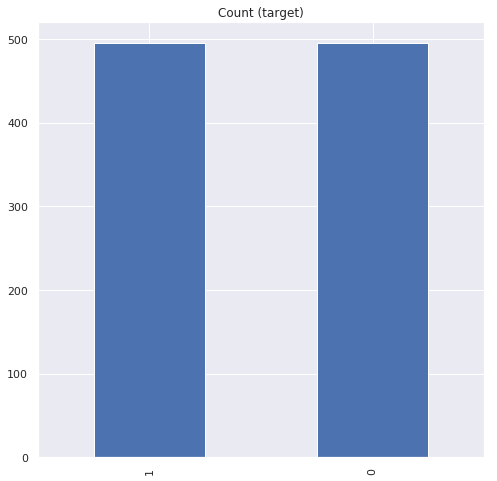

In [82]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Churn'].value_counts())

test_under['Churn'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [90]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, Y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.86%
